# Comparing the power-law collision kernels with jump kernels of subordinate processes. 

In [1]:
include("collisionkernels.jl")
using .CollisionKernels

using Printf

include("subordinate2d.jl")
using .Subordinate2D

using Plots
println("You are using ",Threads.nthreads()," threads. For maximum performance, this number should be near the number of CPU cores that you have in your computer.")

You are using 10 threads. For maximum performance, this number should be near the number of CPU cores that you have in your computer.


In [2]:
function draw_nice_pic(νs::Vector{<:Real}, focus::Integer, s1::Array)
    @assert 1 <= focus <= size(s1)[1]
    println("ν = ",νs[focus])
    q = qofν(νs[focus],dimension=2)
    cq = Cq(q,dimension=2)
    cν = Cnu(νs[focus])
    θr = range(π/(P+1),π/2,length=P)
    θrange = range(π/(P+1),π/2,length=100)
    brange = map(θ->symb(θ,q,dim=2),θrange)
    srange = cq/cν * s1[focus,:]
    plot(θr,(srange),label="b_{sub}", yaxis=:log)
    p2 = plot!(θrange,(brange),label="b_{col}", yaxis=:log)
    display(p2)
    println("Graph for ν=", νs[focus]," in logarithmic scale")
end

function do_everything(P::Integer, νs::Vector{<:Real}, ω::Function)
    println("Computing the Fourier coefficients of the bump functions")
    @time a,m = pre_sample(P)
    println("Evaluating the integral operator at each bump function and sampling the kernel")
    @time s1 = sample_subordinate(νs,ω,a,m)

    for m in 1:length(νs)
        ν = νs[m]
        cν = Cnu(ν)
        qf = qofν(ν,dimension=2)
        cfq = Cq(qf,dimension=2)
    
        min = 1.
        max = 1.
        for i in 2:P
            θ = (1+i)/(P+1) * π/2
            ratio = s1[m,i] / cν / symb(θ,qf,dim=2) * cfq
            if ratio<min
                min = ratio
            end
            if ratio>max
                max = ratio
            end
        end
        println("ν= ",ν,"   min ratio:",min/max)
    end

    println()
    println("Drawing some pictures")
    println()
    
    draw_nice_pic(νs,1,s1)
    draw_nice_pic(νs,length(νs),s1)
end;


function generate_table(P::Integer, qs::Vector{<:Real}, ω::Function)
    νs = map(p->νofq(p,dimension=2),qs)
    println("Computing the Fourier coefficients of the bump functions")
    @time a,m = pre_sample(P)
    println("Evaluating the integral operator at each bump function and sampling the kernel")
    @time s1 = sample_subordinate(νs,ω,a,m)

    println("\\begin{tabular}{|r|r|r|r|r|r|}")
    println("\\hline")
    println("\$q\$ & \$2s\$ & \$\\gamma\$ & \$c_2/C_1\$ & lower bound for \$2\\sqrt{\\Lambda_b}\$ \\\\")
    println("\\hline")
    
    for m in 1:length(νs)
        ν = νs[m]
        cν = Cnu(ν)
        qf = qofν(ν,dimension=2)
        cfq = Cq(qf,dimension=2)
    
        min = 1.
        max = 1.
        for i in 2:P
            θ = (1+i)/(P+1) * π/2
            ratio = s1[m,i] / cν / symb(θ,qf,dim=2) * cfq
            if ratio<min
                min = ratio
            end
            if ratio>max
                max = ratio
            end
        end
        Λb = compute_Λb(ν, θ->ω(θ,ν))
        @printf "%.2f & %.2f & %.2f & %.2f & %.2f \\\\\n" qf ν (qf-3)/(qf-1) min/max 2*sqrt(Λb*min/max)

    end

    println("\\hline")
    println("\\end{tabular}")
end;

Let $b_{col}(\theta)$ be the collision kernel corresponding to a power-law repulsive force with exponent $q$. \textbf{In 2D}, these kernels are known to have the following behavior for small angles.
$$ b_{col}(\theta) = C_q \theta^{-1-\nu}. $$
The exact formula for $b_{col}$ is not explicit. We want to compare it with a kernel $b_{sub}$ of the form
$$ b_{sub}(\theta) = \int_0^\infty \omega(t) h_t(\theta).$$
Here $h_t$ is the heat kernel centered at the north pole $\theta=0$. The weight $\omega(t)$ is an arbitrary weight function. We proved that for any such kernel $b_{sub}$, the inequality (1.4) in our paper holds with constant $\Lambda_{sub} > 2$.

We want to apply the followig fact. If for any weight $\omega \geq 0$, we find two constants $c_1$ and $C_2$ such that
$$c_1 (b_{sub}(\theta) + b_{sub}(\pi-\theta)) \leq (b_{col}(\theta)+b_{col}(\pi-\theta)) \leq C_2 (b_{sub}(\theta) + b_{sub}(\pi-\theta)),$$
then the inequality (1.4) holds for $b_{col}$ with parameter $C_2/c_1 \cdot 6$.

The plan is to compute $b_{col}$ and $b_{sub}$ numerically some weight. The best one I have been able to find for the range $\nu \in [1.,2)$ so far is
$$ \omega(t) := \dots.$$
We then estimate the value of $C_2/c_1$ for a collection of values of $\nu \in [1,2]$.

To draw the graphs, we renormalize $b_{sub}$ so that it has the same asymptotic behavior as $b_{col}$ at $\theta = 0$.

The blue line corresponds to the kernel $b_{sub}$ renormalized. The red line is the kernel $b_{col}$. In most of the graphs the lines are one of top of the other. We can barely recognize there are two distinct curves.

The graphs are in logarithmic scale.

Computing the Fourier coefficients of the bump functions
  0.680978 seconds (139.78 M allocations: 2.083 GiB, 24.03% gc time)
Evaluating the integral operator at each bump function and sampling the kernel
  1.063518 seconds (517.59 k allocations: 35.429 MiB, 1.54% gc time, 950.10% compilation time: 10% of which was recompilation)
ν= 1.0   min ratio:0.9996946487108019
ν= 1.25   min ratio:0.952954770581782
ν= 1.5   min ratio:0.9785132999781787
ν= 1.75   min ratio:0.9513157036010426
ν= 1.925   min ratio:0.9336691744286573
ν= 1.95   min ratio:0.9321941085607522
ν= 1.99   min ratio:0.9304221732006598
ν= 1.995   min ratio:0.9302547116496205

Drawing some pictures

ν = 1.0


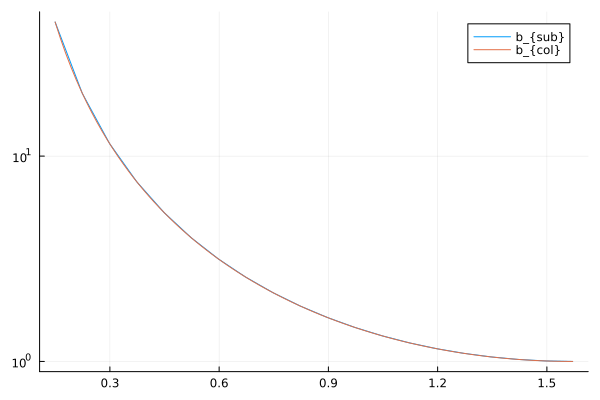

Graph for ν=1.0 in logarithmic scale
ν = 1.995


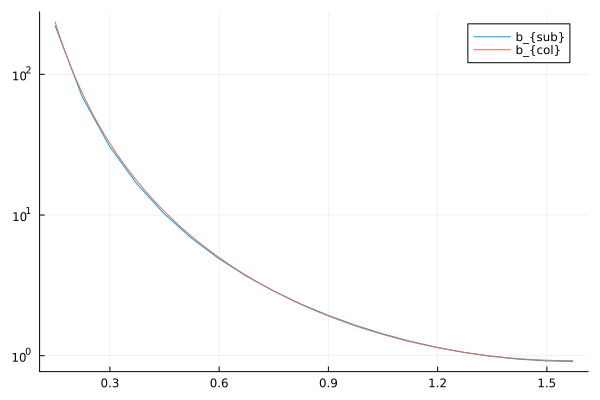

Graph for ν=1.995 in logarithmic scale


In [21]:
# This is the only cell you may want to edit unless you know what you are doing.

# P is the number of points used in the sample of the subordinate kernel
# The subordinate kernel will be compared with the collision kernel at P equidistant points between 0 and π/2
# The computation is slow. Do not make P too large.
# Use a small value of P to experiment (P=12)
# and a larger one for the final computation (P=50)
P = 20

# This is the list of values of ν for which we will sample the ratio between kernels
# Be aware that if you choose ν too close to 2, strange things may happen due to numerical error.
#νs = [1.1,1.25,1.5,1.75,1.89,1.9,1.925,1.95,1.975,1.99]
νs = [1,1.25,1.5,1.75,1.925,1.95,1.99,1.995]

# This is the function ω that we use to produce the subordinate kernel
function ω(t,ν) 
        return 1 + 2*(ν-1)^2*(1-exp(-2t))
end

# This one is good for ν in [1,1.5]
# ω(t,ν) = 1 + ((ν-1) + ν*(ν-1)^2)*(1-1/(t/2+1))

# This one is good for ν in [1,1.9] But it is not so good for ν=1.99
# ω(t,ν) = 1 + sqrt(2-ν) * (8*(ν-1)^3)*(1-exp(-t)

do_everything(P,νs,ω)

In [12]:
# We also want to estimate the values of $c_K$ and $C_P$ for these kernels.
using QuadGK

Λlocal = 4.

function compute_cK(ν::Real, ω::Function)
    factor = Subordinate2D.subordinate_factor(ν)
    Cν = 1/(2*factor)
    return quadgk(t -> Cν*ω(t)*t^(-1-ν/2)*(1-exp(-2Λlocal *t)),0,Inf)[1]
end

function compute_cP(ν::Real, ω::Function)
    factor = Subordinate2D.subordinate_factor(ν)
    Cν = 1/(2*factor)
    return quadgk(t -> Cν*ω(t)*t^(-1-ν/2)*(1-exp(-4*t)),0,Inf)[1]
end

function compute_Λb(ν::Real, ω::Function)
    return 2*compute_cK(ν,ω) / compute_cP(ν,ω)
end

compute_Λb (generic function with 1 method)

In [5]:
ν = 1.5
println("For ν = ",ν)
println("cK= ",compute_cK(ν,t->ω(t,ν)),"  cP= ",compute_cP(ν,t->ω(t,ν)), "   Λb=",compute_Λb(ν,t->ω(t,ν)))

For ν = 1.5
cK= 2.518425312357639  cP= 1.5353010584025089   Λb=3.2806924721045623


In [22]:
P=30
qs = [1.99,1.9,1.8,1.7,1.6,1.55,1.51,1.501]
#qs = [1.55,1.51,1.505,1.501]
generate_table(P,qs,ω)

Computing the Fourier coefficients of the bump functions
  1.393806 seconds (310.62 M allocations: 4.629 GiB, 26.67% gc time)
Evaluating the integral operator at each bump function and sampling the kernel
  0.070837 seconds (27.53 k allocations: 8.223 MiB, 29.83% gc time)
\begin{tabular}{|r|r|r|r|r|r|}
\hline
$q$ & $2s$ & $\gamma$ & $c_2/C_1$ & lower bound for $2\sqrt{\Lambda_b}$ \\
\hline
1.99 & 1.01 & -1.02 & 1.00 & 3.36 \\
1.90 & 1.11 & -1.22 & 0.96 & 3.36 \\
1.80 & 1.25 & -1.50 & 0.95 & 3.41 \\
1.70 & 1.43 & -1.86 & 0.97 & 3.52 \\
1.60 & 1.67 & -2.33 & 0.96 & 3.63 \\
1.55 & 1.82 & -2.64 & 0.94 & 3.69 \\
1.51 & 1.96 & -2.92 & 0.93 & 3.79 \\
1.50 & 2.00 & -2.99 & 0.93 & 3.82 \\
\hline
\end{tabular}


In [7]:
# This function computes the kernel of the fractional Laplacian (-Δ)^s
# It is normalized so that ≈ θ^(-1-2s) for θ small.
function fractional_laplacian(θ::Real, s::Real, K::Integer=100)
    @assert 0. <= s <= 1.
    res = 0.
    for k in -K:K
        res += abs(θ - π*k)^(-1-2s)
    end
    res += ( abs(π*(K+0.5) - θ)^(-2s) + abs(π*(K+0.5) + θ)^(-2s) ) / (s*π)
    return res
end

fractional_laplacian (generic function with 2 methods)

Computing the Fourier coefficients of the bump functions
  0.612706 seconds (139.78 M allocations: 2.083 GiB, 23.91% gc time, 0.45% compilation time)
Evaluating the integral operator at each bump function and sampling the kernel
  1.044101 seconds (470.05 k allocations: 30.274 MiB, 2.57% gc time, 995.99% compilation time: 10% of which was recompilation)


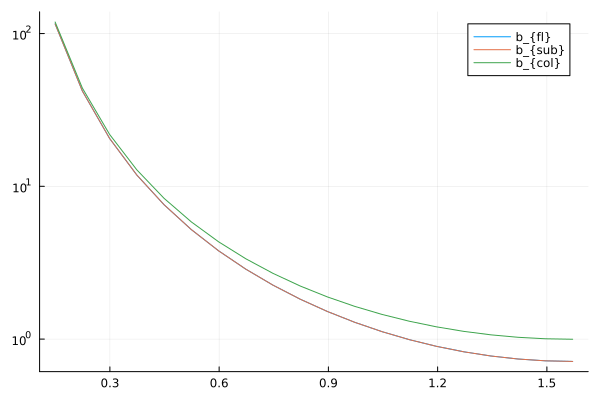

In [8]:
# Let us compare the two computations for the fractional Laplacian
ω(t,ν) = 1
P = 20
νs = [1.5]  # =2s

println("Computing the Fourier coefficients of the bump functions")
@time a,m = pre_sample(P)
println("Evaluating the integral operator at each bump function and sampling the kernel")
@time s1 = sample_subordinate(νs,ω,a,m)

ν = νs[1]
cν = Cnu(ν)
qf = qofν(ν,dimension=2)
cfq = Cq(qf,dimension=2)

θr = range(π/(P+1),π/2,length=P)
θrange = range(π/(P+1),π/2,length=100)
srange = 1/cν * s1[1,:]
plot(θr,θ->fractional_laplacian(θ,ν/2),label="b_{fl}", yaxis=:log)
plot!(θr,(srange),label="b_{sub}", yaxis=:log)
plot!(θr,θ->symb(θ,qf,dim=2)/cfq,label="b_{col}",yaxis=:log)


In [9]:
using SpecialFunctions

In [10]:
ν = 1.996
println(Cnu(ν))   ## Kernel ≈ Cnu θ^(-1-ν)    Cnu ≈ (2-ν) for ν≈2
println(1/Subordinate2D.subordinate_factor(ν))  ## kernel = 1/factor \int_0^\infty heat_t t^{-1-ν/2} dt
println(1/(-gamma(-ν/2)))
## factor = \int_0^\infty (1-e^{-t}) t^{-1-ν/2} dt = -Γ(-s)
## ≈ \int_0^ϵ t^{-ν/2} dt = 1/(1-ν/2) ϵ^{1-ν/2} ≈ 1/(1-ν/2)


0.0019926245210141313
0.0019982990077383835
0.0019982990077383835
